In [26]:
from azure.storage.file import FileService
import os
import pandas as pd
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

In [27]:
my_key = 'AJCUenkBC+LYslpZXFlJqha/pcNHWNBNoDQg/+rHb7QFktedIKuczFhMfbJPl2fn3lO6+xNkBDoXtm7QBSukFA=='
my_name = 'nithindev'
file_service = FileService(account_key=my_key,account_name=my_name)

In [28]:
os.makedirs('data',exist_ok=True)

In [29]:
file_service.get_file_to_path(share_name='traffic-data',
                              directory_name='clean_data',
                              file_name='master.csv',
                              file_path='data/master.csv'
                             )

In [30]:
df = pd.read_csv('data/master.csv')
df['ts_india'] = pd.to_datetime(df['ts_india'])
df['ts_utc'] = pd.to_datetime(df['ts_utc'])
df = df.sort_values(['ts_india']).reset_index(drop=True)

In [31]:
df.head(2)

,distance_text,distance_value,duration_text,duration_value,duration_in_traffic_text,duration_in_traffic_value,status,origin_address,desination_address,start_coord,end_coord,junction,road,ts_india,ts_utc
0,1.3 km,1287,4 mins,258,2 mins,147,OK,"95/5, 3Floor, ACR Greens, Outer Ring Road Mara...","Kundalhalli Gate Bus Stop, Bengaluru, Karnatak...","12.956837, 77.702933","12.955877, 77.714762",junction-1,1,2019-06-06 06:30:31,2019-06-06 01:00:31
1,0.7 km,709,3 mins,192,2 mins,94,OK,"20, HAL Old Airport Rd, Konena Agrahara, Murge...","Blue Dart Express, Wind Tunnel Rd, Kaveri Naga...","12.959191, 77.660660","12.959375, 77.654186",junction-3,2,2019-06-06 06:30:31,2019-06-06 01:00:31


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1990 entries, 0 to 1989
Data columns (total 15 columns):
distance_text                1990 non-null object
distance_value               1990 non-null int64
duration_text                1990 non-null object
duration_value               1990 non-null int64
duration_in_traffic_text     1990 non-null object
duration_in_traffic_value    1990 non-null int64
status                       1990 non-null object
origin_address               1990 non-null object
desination_address           1990 non-null object
start_coord                  1990 non-null object
end_coord                    1990 non-null object
junction                     1990 non-null object
road                         1990 non-null int64
ts_india                     1990 non-null datetime64[ns]
ts_utc                       1990 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(9)
memory usage: 233.3+ KB


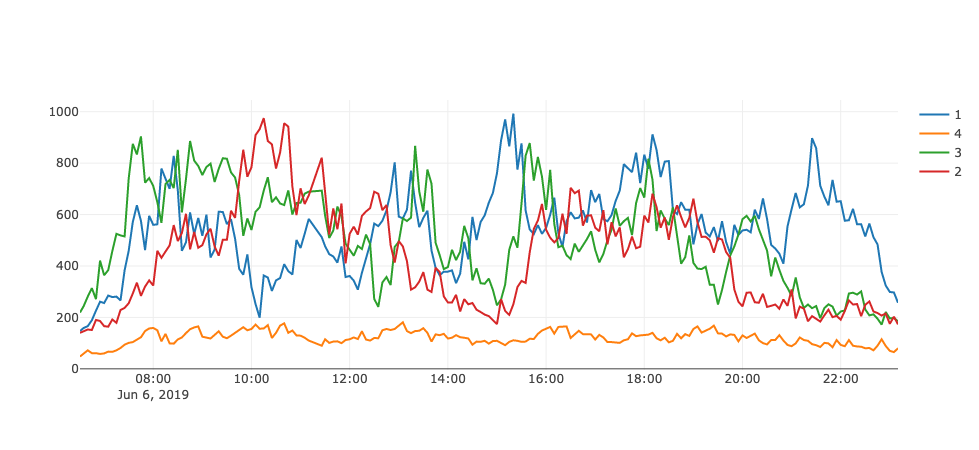

In [33]:
traces_jnc1 = []
df_j1 = df[df['junction']=='junction-1']
for road in df_j1.road.unique():
    df_j1_ = df_j1[df_j1['road']==road]
    tr = go.Scatter(x=df_j1_['ts_india'],y=df_j1_['duration_in_traffic_value'],name=str(road))
    traces_jnc1.append(tr)
iplot(traces_jnc1)

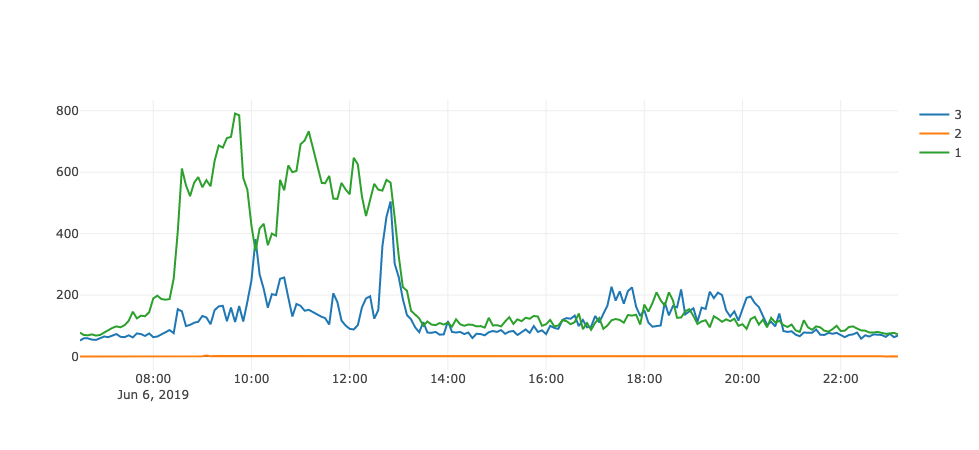

In [34]:
traces_jnc2 = []
df_j2 = df[df['junction']=='junction-2']
for road in df_j2.road.unique():
    df_j2_ = df_j2[df_j2['road']==road]
    tr = go.Scatter(x=df_j2_['ts_india'],y=df_j2_['duration_in_traffic_value'],name=str(road))
    traces_jnc2.append(tr)
iplot(traces_jnc2)

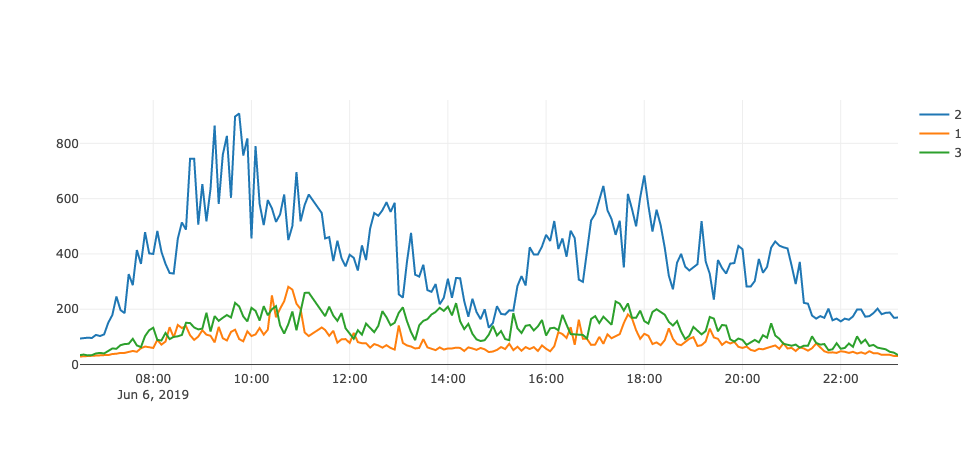

In [35]:
traces_jnc3 = []
df_j3 = df[df['junction']=='junction-3']
for road in df_j3.road.unique():
    df_j3_ = df_j3[df_j3['road']==road]
    tr = go.Scatter(x=df_j3_['ts_india'],y=df_j3_['duration_in_traffic_value'],name=str(road))
    traces_jnc3.append(tr)
iplot(traces_jnc3)

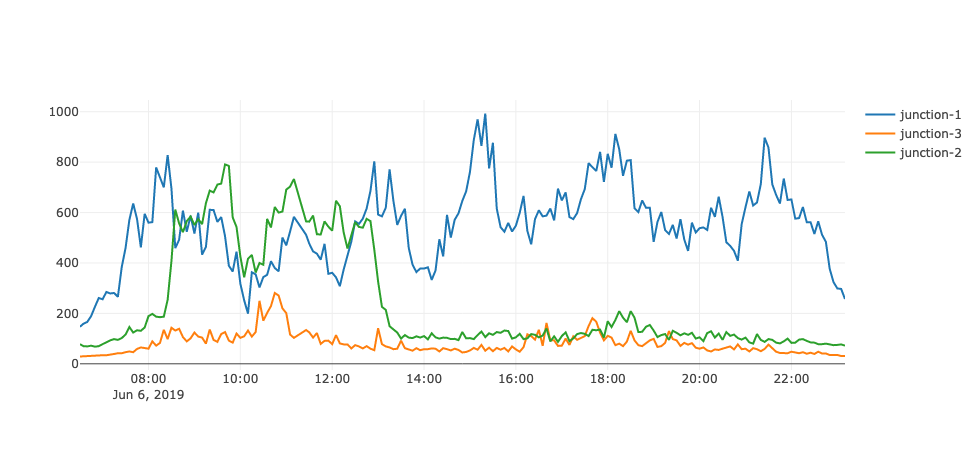

In [36]:
traces_r1 = []
df_r1 = df[df['road']==1]
for jnc in df_r1['junction'].unique():
    df_r1_ = df_r1[df_r1['junction']==jnc]
    tr = go.Scatter(x=df_r1_['ts_india'],y=df_r1_['duration_in_traffic_value'],name=jnc)
    traces_r1.append(tr)
iplot(traces_r1)

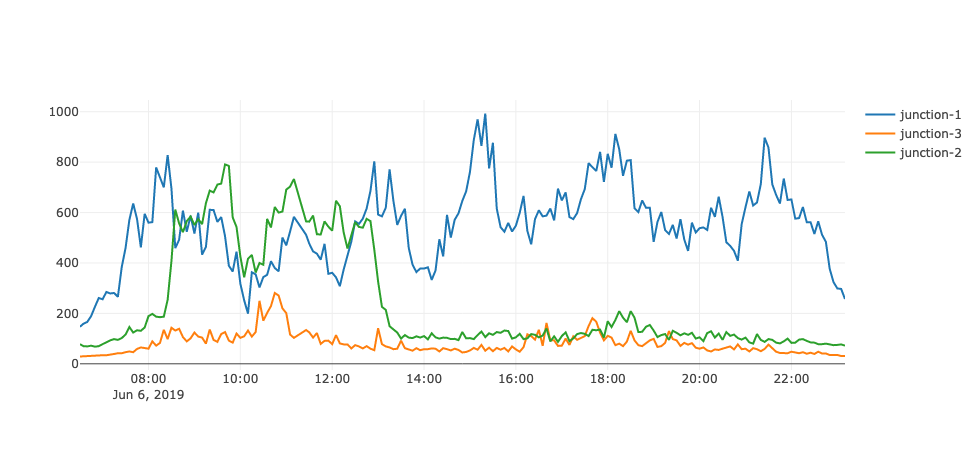

In [37]:
traces_r1 = []
df_r1 = df[df['road']==1]
for jnc in df_r1['junction'].unique():
    df_r1_ = df_r1[df_r1['junction']==jnc]
    tr = go.Scatter(x=df_r1_['ts_india'],y=df_r1_['duration_in_traffic_value'],name=jnc)
    traces_r1.append(tr)
iplot(traces_r1)